In [ ]:
import numpy as np
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

from src.datasets.utils import get_dataset
from src.estimator.OLS import OLSClient
from src.server import Server

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
(X_train, y_train), (X_test, y_test) = get_dataset("mnist")
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
c = OLSClient(-1, X_train, y_train, lambda x: 1 / (1 + x))

In [ ]:
np.linalg.pinv(c.X).shape

In [ ]:
c.y.shape

In [ ]:
est = c.local_estimate()

In [ ]:
N = 5
clients = []

num_samples = np.random.randint(10, 100, N)

for i in range(N):
    idx = np.random.choice(range(X.shape[0]), num_samples[i])
    X_i, y_i = X[idx], y[idx]
    clients.append(OLSClient(i, X_i, y_i, lambda x: 1 / (1 + x)))

server = Server(clients)

In [ ]:
server.aggregate(unbiased=True)

/home/echo/miniconda3/envs/incent-collab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Iteration 1, loss = 0.08818227
Iteration 2, loss = 0.00001822
Iteration 3, loss = 0.00002371
Iteration 4, loss = 0.00002561
Iteration 5, loss = 0.00002622
Iteration 6, loss = 0.00002642
Iteration 7, loss = 0.00002648
Iteration 8, loss = 0.00002650
Iteration 9, loss = 0.00002650
Iteration 10, loss = 0.00002650
Iteration 11, loss = 0.00002650
Iteration 12, loss = 0.00002650
Iteration 13, loss = 0.00002650
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 1.000000
Test set score: 1.000000


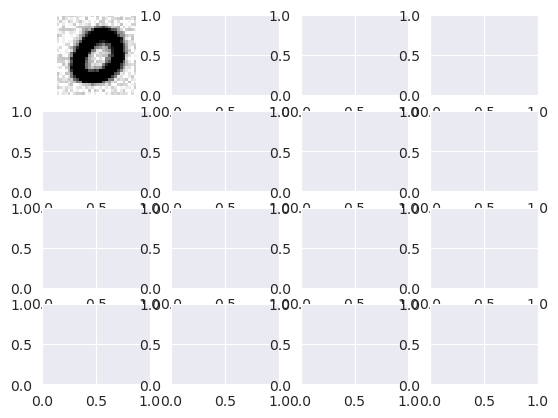

In [61]:
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
X, y = X[y == '0'], y[y == '0']
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

mlp = MLPClassifier(
    hidden_layer_sizes=(),
    activation='identity',
    alpha=1e-4,
    solver="sgd",
    verbose=10,
    random_state=1,
    learning_rate_init=0.2,
)
mlp.out_activation_ = 'identity'
mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))

fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

In [62]:
mlp.out_activation_

'logistic'

In [32]:
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)
#number1, number2 = 0, 1
#X, y = X[np.logical_or(y == number1, y == number2)], y[np.logical_or(y == number1, y == number2)]
y = np.eye(10)[y]
X = X / 255.0

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

lr = LinearRegression()

lr.fit(X_train, y_train)

print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))

/home/echo/miniconda3/envs/incent-collab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training set score: 0.586534
Test set score: -59149136314360216.000000


In [ ]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split, GridSearchCV

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)
#number1, number2 = 0, 1
#X, y = X[np.logical_or(y == number1, y == number2)], y[np.logical_or(y == number1, y == number2)]
#y = np.eye(2)[y]
X = X / 255.

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

lr = Ridge(solver='svd')
gs = GridSearchCV(lr, scoring=make_scorer(mean_squared_error), param_grid={'alpha': np.logspace(-3, 3, 7)}, n_jobs=-1, verbose=10)

gs = gs.fit(X_train, y_train)

/home/echo/miniconda3/envs/incent-collab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting 5 folds for each of 7 candidates, totalling 35 fits


In [14]:
gs.best_params_

{'alpha': 0.001}

In [34]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)
X = X / 255.

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)
X_train = X_train[:, sfs.get_support()]
X_test = X_test[:, sfs.get_support()]

lr = Ridge(solver='svd')
lr.fit(X_train, y_train)

print("Training set score: %f" % lr.score(X_train, y_train))
print("Test set score: %f" % lr.score(X_test, y_test))

/home/echo/miniconda3/envs/incent-collab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Training set score: 0.564589
Test set score: 0.556609


In [8]:
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.feature_selection import SequentialFeatureSelector, RFECV
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = y.astype(np.uint8)
X = X / 255.

# Split data into train partition and test partition
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.7)

lr = Ridge(solver='svd')
sfs = RFECV(lr, scoring=make_scorer(mean_squared_error), min_features_to_select=100, n_jobs=-1, verbose=10)

sfs.fit(X_train, y_train)
sfs.get_support()

/home/echo/miniconda3/envs/incent-collab/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Fitting estimator with 142 features.
Fitting estimator with 141 features.
Fitting estimator with 140 features.
Fitting estimator with 139 features.
Fitting estimator with 138 features.
Fitting estimator with 137 features.
Fitting estimator with 136 features.
Fitting estimator with 135 features.
Fitting estimator with 134 features.
Fitting estimator with 133 features.
Fitting estimator with 132 features.
Fitting estimator with 131 features.
Fitting estimator with 130 features.
Fitting estimator with 129 features.
Fitting estimator with 128 features.
Fitting estimator with 127 features.
Fitting estimator with 126 features.
Fitting estimator with 125 features.
Fitting estimator with 124 features.
Fitting estimator with 123 features.
Fitting estimator with 122 features.
Fitting estimator with 121 features.
Fitting estimator with 120 features.
Fitting estimator with 119 features.
Fitting estimator with 118 features.
Fitting estimator with 117 features.
Fitting estimator with 116 features.
F

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True, False,  True,  True, False,
        True, False,  True, False,  True, False,  True, False,  True,
       False, False, False, False, False, False,  True, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False,  True,
       False, False,

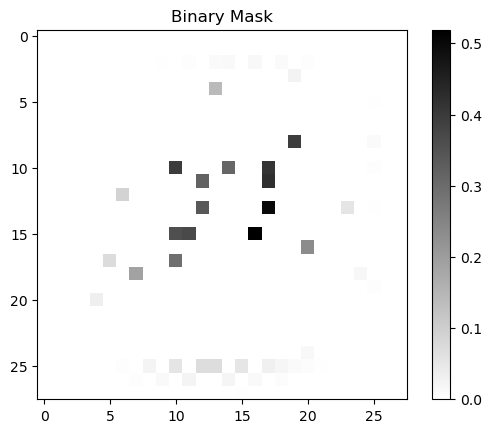

In [27]:
plt.imshow((X.mean(axis=0) * sfs.get_support()).reshape(28, 28), cmap='binary', interpolation='nearest')
plt.title('Binary Mask')
plt.colorbar()
plt.show()

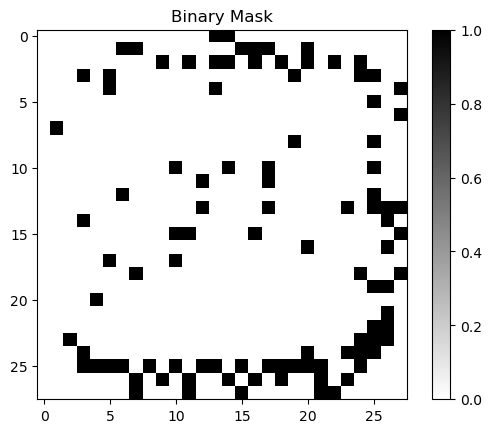

In [9]:
plt.imshow(sfs.get_support().reshape(28, 28), cmap='binary', interpolation='nearest')
plt.title('Binary Mask')
plt.colorbar()
plt.show()

In [48]:
lr.coef_.shape

(2, 784)

ValueError: cannot reshape array of size 1568 into shape (28,28)

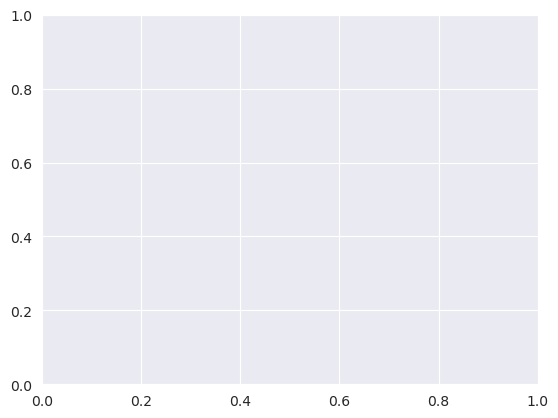

In [47]:
fig, ax = plt.subplots(1, 1)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = lr.coef_.min(), lr.coef_.max()
coef = lr.coef_
ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
ax.set_xticks(())
ax.set_yticks(())

plt.show()

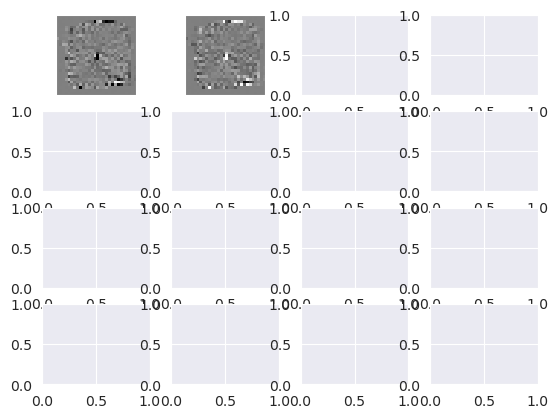

In [50]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = lr.coef_.min(), lr.coef_.max()
for coef, ax in zip(lr.coef_, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=0.5 * vmin, vmax=0.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()